In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

train = pd.read_csv("D:\project/PJT002_train.csv", encoding = 'utf-8')

C:\Users\Caleb\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (8,172,173,174,175,176,177,178,179) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


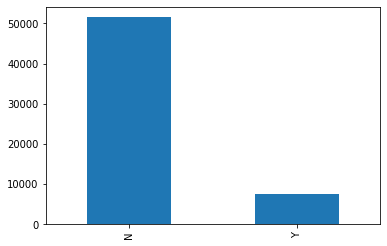

In [3]:
train['fr_yn'].value_counts().plot(kind='bar')

In [4]:
train.iloc[0:5,[159,161,164,165,166,167,168,169,170]]

,fr_sttn_dstnc,fr_wthr_fclt_dstnc,cctv_dstnc,fr_wthr_fclt_in_100m,cctv_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc
0,4547,133,112,0,0,1891,29231,11322,88
1,6388,489,818,0,0,4533,20480,3369,7727
2,3340,143,165,0,0,277,31197,12451,72
3,179,1585,131,0,0,438,4270,407,508
4,4822,603,686,0,0,1702,29778,12487,707


# 거리
119 안전센터와의 거리
소방용수시설(소화전 등)과의 최소 거리
공공 CCTV와의 최소 거리
반경 100m 이내 공공 CCTV
반경 100m 이내 소방용수 시설 수
담배 소매점과의 최소 거리
안전 비상벨과의 최소 거리
자동 심장 충격기와의 최소 거리
금연구역과의 최소 거리

## 119 안전센터와의 거리

In [60]:
def cat_search(var1,var2) : 
    var1_name = var1.name
    var2_name = var2.name
    
    var1_cat_nums = var1.unique()
    var1_count = var1.value_counts()
    var2_total = len(var2)

    var1_var2 = pd.DataFrame(np.c_[var1,var2],columns=[var1_name,var2_name])
    
    var2_count_by_cat = var1_var2.groupby(axis=0,by=var1_name).count()
    var2_count_Y_by_cat = var1_var2[ var1_var2[var2.name]=='Y' ].groupby(by=var1_name).count()
    var2_count_N_by_cat = var1_var2[ var1_var2[var2.name]=='N' ].groupby(by=var1_name).count()
    
    weights = (var2_count_by_cat / len(var2)).round(3)
    
    output= pd.concat([var2_count_by_cat,var2_count_Y_by_cat,var2_count_N_by_cat,weights],axis=1,join='outer')
    output= output.fillna(0)
    output.columns = ['Total','Y','N','weights']
    
    output['Y/Total'] = (output['Y']/output['Total']).round(2)
    output['N/Total'] = (output['N']/output['Total']).round(2)
    
    return output

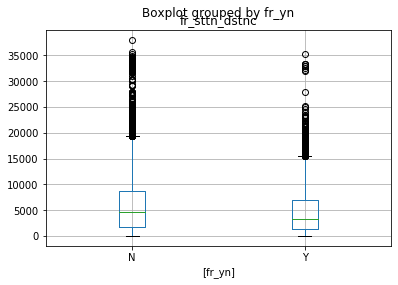

In [72]:
pd.DataFrame(train[['fr_sttn_dstnc','fr_yn']]).boxplot(by='fr_yn')

In [76]:
print(min(train.fr_sttn_dstnc))
print(max(train.fr_sttn_dstnc))
bins_temrtr = [-4, 5000, 10000, 15000,20000,25000,30000,35000,40000,45000,50000,55000,60000]
train['fr_sttn_dstnc_bins'] = pd.cut(train['fr_sttn_dstnc'], bins_temrtr)
train['fr_sttn_dstnc_bins']

4
38044


0           (-4, 5000]
1        (5000, 10000]
2           (-4, 5000]
3           (-4, 5000]
4           (-4, 5000]
             ...      
59194       (-4, 5000]
59195       (-4, 5000]
59196    (5000, 10000]
59197    (5000, 10000]
59198       (-4, 5000]
Name: fr_sttn_dstnc_bins, Length: 59199, dtype: category
Categories (12, interval[int64]): [(-4, 5000] < (5000, 10000] < (10000, 15000] < (15000, 20000] ... (40000, 45000] < (45000, 50000] < (50000, 55000] < (55000, 60000]]

In [89]:
train.columns.get_loc('fr_sttn_dstnc_bins')

180

In [92]:
cat_search(train.iloc[:,180],train.iloc[:,1])

,Total,Y,N,weights,Y/Total,N/Total
fr_sttn_dstnc_bins,,,,,,
"(-4, 5000]",31619,4816,26803,0.534,0.15,0.85
"(5000, 10000]",16593,1822,14771,0.280,0.11,0.89
"(10000, 15000]",8022,744,7278,0.136,0.09,0.91
"(15000, 20000]",2354,225,2129,0.040,0.10,0.90
"(20000, 25000]",426,38,388,0.007,0.09,0.91
"(25000, 30000]",55,3,52,0.001,0.05,0.95
"(30000, 35000]",126,8,118,0.002,0.06,0.94
"(35000, 40000]",4,1,3,0.000,0.25,0.75


fr_yn
N    AxesSubplot(0.125,0.125;0.775x0.755)
Y    AxesSubplot(0.125,0.125;0.775x0.755)
Name: fr_sttn_dstnc, dtype: object

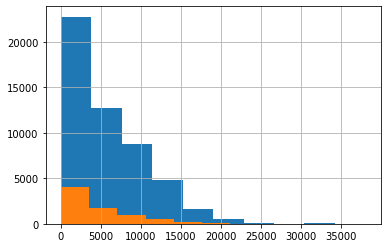

In [91]:
train.groupby(by='fr_yn').fr_sttn_dstnc.hist()

## 소방용수시설(소화전 등)과의 최소 거리

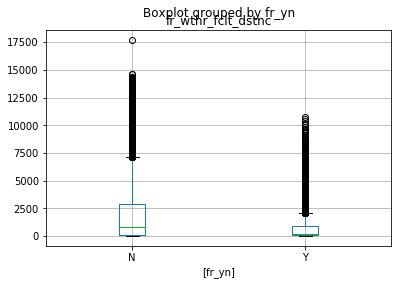

In [81]:
pd.DataFrame(train[['fr_wthr_fclt_dstnc','fr_yn']]).boxplot(by='fr_yn')

In [83]:
print(min(train.fr_wthr_fclt_dstnc))
print(max(train.fr_wthr_fclt_dstnc))
bins_temrtr = [0, 1000, 2000, 3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,18000]
train['fr_wthr_fclt_dstnc_bins'] = pd.cut(train['fr_wthr_fclt_dstnc'], bins_temrtr)
train['fr_wthr_fclt_dstnc_bins']


0
17716


0           (0, 1000]
1           (0, 1000]
2           (0, 1000]
3        (1000, 2000]
4           (0, 1000]
             ...     
59194       (0, 1000]
59195       (0, 1000]
59196       (0, 1000]
59197       (0, 1000]
59198       (0, 1000]
Name: fr_wthr_fclt_dstnc_bins, Length: 59199, dtype: category
Categories (17, interval[int64]): [(0, 1000] < (1000, 2000] < (2000, 3000] < (3000, 4000] ... (13000, 14000] < (14000, 15000] < (15000, 16000] < (16000, 18000]]

In [84]:
train.columns.get_loc('fr_wthr_fclt_dstnc_bins')

181

In [85]:
cat_search(train.iloc[:,181],train.iloc[:,1])

,Total,Y,N,weights,Y/Total,N/Total
fr_wthr_fclt_dstnc_bins,,,,,,
"(0.0, 1000.0]",33979,5909.0,28070,0.574,0.17,0.83
"(1000.0, 2000.0]",8044,846.0,7198,0.136,0.11,0.89
"(2000.0, 3000.0]",3981,390.0,3591,0.067,0.10,0.90
"(3000.0, 4000.0]",2393,212.0,2181,0.040,0.09,0.91
"(4000.0, 5000.0]",2043,107.0,1936,0.035,0.05,0.95
"(5000.0, 6000.0]",1687,69.0,1618,0.028,0.04,0.96
"(6000.0, 7000.0]",2046,41.0,2005,0.035,0.02,0.98
"(7000.0, 8000.0]",2297,45.0,2252,0.039,0.02,0.98
"(8000.0, 9000.0]",1267,19.0,1248,0.021,0.01,0.99


fr_yn
N    AxesSubplot(0.125,0.125;0.775x0.755)
Y    AxesSubplot(0.125,0.125;0.775x0.755)
Name: fr_wthr_fclt_dstnc, dtype: object

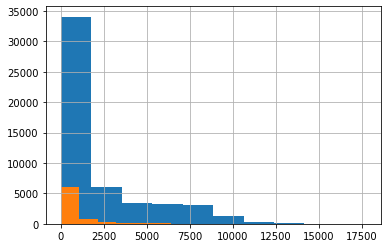

In [86]:
train.groupby(by='fr_yn').fr_wthr_fclt_dstnc.hist()

## 공공 CCTV와의 최소 거리

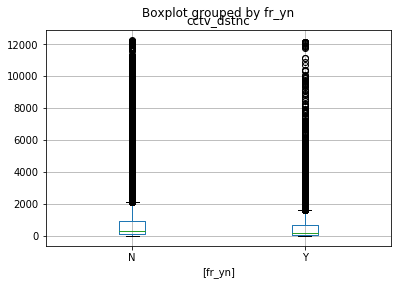

In [93]:
pd.DataFrame(train[['cctv_dstnc','fr_yn']]).boxplot(by='fr_yn')

## 반경 100m 이내 공공 CCTV

In [13]:
train['cctv_in_100m'].unique()

array([ 0,  2,  1,  4,  3,  6,  5,  7,  8, 11, 14, 12,  9, 13, 15, 19, 10,
       16, 21, 18, 20, 17, 24], dtype=int64)

In [95]:
print(min(train.cctv_dstnc))
print(max(train.cctv_dstnc))
bins_temrtr = [0, 1000, 2000, 3000,4000,5000,6000,7000,8000,9000,10000,11000,13000]
train['cctv_dstnc_bins'] = pd.cut(train['cctv_dstnc'], bins_temrtr)
train['cctv_dstnc_bins']

0
12278


0           (0, 1000]
1           (0, 1000]
2           (0, 1000]
3           (0, 1000]
4           (0, 1000]
             ...     
59194    (1000, 2000]
59195       (0, 1000]
59196       (0, 1000]
59197       (0, 1000]
59198       (0, 1000]
Name: cctv_dstnc_bins, Length: 59199, dtype: category
Categories (12, interval[int64]): [(0, 1000] < (1000, 2000] < (2000, 3000] < (3000, 4000] ... (8000, 9000] < (9000, 10000] < (10000, 11000] < (11000, 13000]]

In [96]:
train.columns.get_loc('cctv_dstnc_bins')

182

In [98]:
cat_search(train.iloc[:,182],train.iloc[:,1])

,Total,Y,N,weights,Y/Total,N/Total
cctv_dstnc_bins,,,,,,
"(0.0, 1000.0]",46069,6295,39774,0.778,0.14,0.86
"(1000.0, 2000.0]",8483,866,7617,0.143,0.10,0.90
"(2000.0, 3000.0]",2065,190,1875,0.035,0.09,0.91
"(3000.0, 4000.0]",788,87,701,0.013,0.11,0.89
"(4000.0, 5000.0]",437,61,376,0.007,0.14,0.86
"(5000.0, 6000.0]",339,47,292,0.006,0.14,0.86
"(6000.0, 7000.0]",246,30,216,0.004,0.12,0.88
"(7000.0, 8000.0]",226,31,195,0.004,0.14,0.86
"(8000.0, 9000.0]",161,10,151,0.003,0.06,0.94


fr_yn
N    AxesSubplot(0.125,0.125;0.775x0.755)
Y    AxesSubplot(0.125,0.125;0.775x0.755)
Name: cctv_dstnc, dtype: object

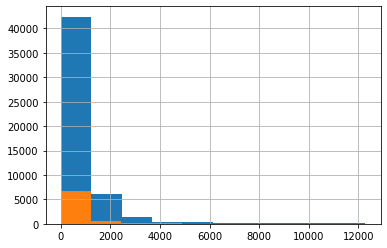

In [99]:
train.groupby(by='fr_yn').cctv_dstnc.hist()

## 반경 100m 이내 소방용수 시설 수

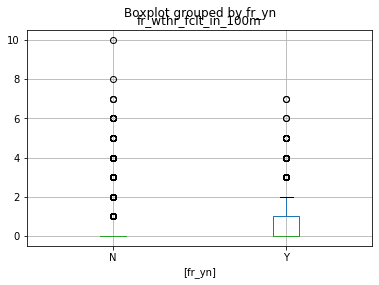

In [100]:
pd.DataFrame(train[['fr_wthr_fclt_in_100m','fr_yn']]).boxplot(by='fr_yn')

In [102]:
print(min(train.fr_wthr_fclt_in_100m))
print(max(train.fr_wthr_fclt_in_100m))
bins_temrtr = [0, 1, 2, 3,4,5,6,7,8,9,10]
train['fr_wthr_fclt_in_100m_bins'] = pd.cut(train['fr_wthr_fclt_in_100m'], bins_temrtr)
train['fr_wthr_fclt_in_100m_bins']


0
10


0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
59194           NaN
59195           NaN
59196    (1.0, 2.0]
59197           NaN
59198           NaN
Name: fr_wthr_fclt_in_100m_bins, Length: 59199, dtype: category
Categories (10, interval[int64]): [(0, 1] < (1, 2] < (2, 3] < (3, 4] ... (6, 7] < (7, 8] < (8, 9] < (9, 10]]

In [103]:
train.columns.get_loc('fr_wthr_fclt_in_100m_bins')

183

In [104]:
cat_search(train.iloc[:,183],train.iloc[:,1])

,Total,Y,N,weights,Y/Total,N/Total
fr_wthr_fclt_in_100m_bins,,,,,,
"(0.0, 1.0]",7668,1448.0,6220,0.130,0.19,0.81
"(1.0, 2.0]",2168,485.0,1683,0.037,0.22,0.78
"(2.0, 3.0]",533,124.0,409,0.009,0.23,0.77
"(3.0, 4.0]",167,45.0,122,0.003,0.27,0.73
"(4.0, 5.0]",36,11.0,25,0.001,0.31,0.69
"(5.0, 6.0]",11,2.0,9,0.000,0.18,0.82
"(6.0, 7.0]",5,2.0,3,0.000,0.40,0.60
"(7.0, 8.0]",1,0.0,1,0.000,0.00,1.00
"(9.0, 10.0]",1,0.0,1,0.000,0.00,1.00


fr_yn
N    AxesSubplot(0.125,0.125;0.775x0.755)
Y    AxesSubplot(0.125,0.125;0.775x0.755)
Name: fr_wthr_fclt_in_100m, dtype: object

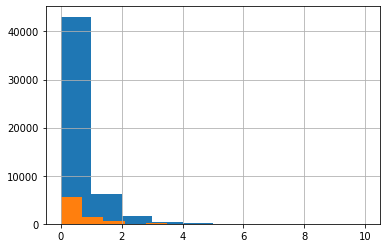

In [105]:
train.groupby(by='fr_yn').fr_wthr_fclt_in_100m.hist()

## 담배 소매점과의 최소 거리

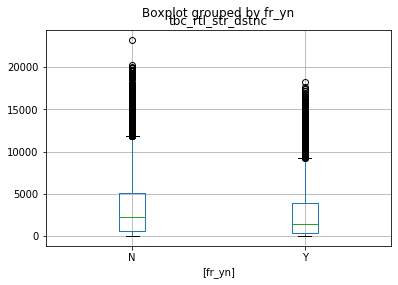

In [106]:
pd.DataFrame(train[['tbc_rtl_str_dstnc','fr_yn']]).boxplot(by='fr_yn')

In [108]:
print(min(train.tbc_rtl_str_dstnc))
print(max(train.tbc_rtl_str_dstnc))
bins_temrtr = [0, 2000, 4000, 6000,8000,10000,12000,14000,16000,18000,20000,22000,24000]
train['tbc_rtl_str_dstnc_bins'] = pd.cut(train['tbc_rtl_str_dstnc'], bins_temrtr)
train['tbc_rtl_str_dstnc_bins']

0
23228


0           (0, 2000]
1        (4000, 6000]
2           (0, 2000]
3           (0, 2000]
4           (0, 2000]
             ...     
59194    (2000, 4000]
59195    (2000, 4000]
59196    (4000, 6000]
59197       (0, 2000]
59198       (0, 2000]
Name: tbc_rtl_str_dstnc_bins, Length: 59199, dtype: category
Categories (12, interval[int64]): [(0, 2000] < (2000, 4000] < (4000, 6000] < (6000, 8000] ... (16000, 18000] < (18000, 20000] < (20000, 22000] < (22000, 24000]]

In [109]:
train.columns.get_loc('tbc_rtl_str_dstnc_bins')

184

In [110]:
cat_search(train.iloc[:,184],train.iloc[:,1])

,Total,Y,N,weights,Y/Total,N/Total
tbc_rtl_str_dstnc_bins,,,,,,
"(0.0, 2000.0]",28264,4361.0,23903,0.477,0.15,0.85
"(2000.0, 4000.0]",11683,1370.0,10313,0.197,0.12,0.88
"(4000.0, 6000.0]",8346,821.0,7525,0.141,0.10,0.90
"(6000.0, 8000.0]",4715,443.0,4272,0.080,0.09,0.91
"(8000.0, 10000.0]",2835,297.0,2538,0.048,0.10,0.90
"(10000.0, 12000.0]",1896,210.0,1686,0.032,0.11,0.89
"(12000.0, 14000.0]",826,66.0,760,0.014,0.08,0.92
"(14000.0, 16000.0]",382,34.0,348,0.006,0.09,0.91
"(16000.0, 18000.0]",111,14.0,97,0.002,0.13,0.87


fr_yn
N    AxesSubplot(0.125,0.125;0.775x0.755)
Y    AxesSubplot(0.125,0.125;0.775x0.755)
Name: tbc_rtl_str_dstnc, dtype: object

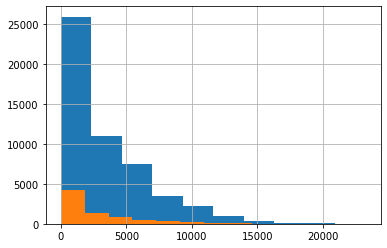

In [111]:
train.groupby(by='fr_yn').tbc_rtl_str_dstnc.hist()

## 안전 비상벨과의 최소 거리

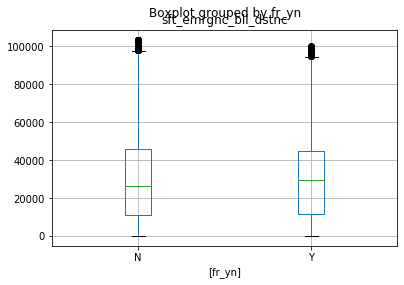

In [112]:
pd.DataFrame(train[['sft_emrgnc_bll_dstnc','fr_yn']]).boxplot(by='fr_yn')

In [115]:
print(min(train.sft_emrgnc_bll_dstnc))
print(max(train.sft_emrgnc_bll_dstnc))
bins_temrtr = [0, 1000, 2000, 3000,4000,5000,6000,7000,8000,9000,11000]
train['sft_emrgnc_bll_dstnc_bins'] = pd.cut(train['sft_emrgnc_bll_dstnc'], bins_temrtr)
train['sft_emrgnc_bll_dstnc_bins']

5
103571


0                      NaN
1                      NaN
2                      NaN
3         (4000.0, 5000.0]
4                      NaN
               ...        
59194     (3000.0, 4000.0]
59195        (0.0, 1000.0]
59196     (6000.0, 7000.0]
59197    (9000.0, 11000.0]
59198                  NaN
Name: sft_emrgnc_bll_dstnc_bins, Length: 59199, dtype: category
Categories (10, interval[int64]): [(0, 1000] < (1000, 2000] < (2000, 3000] < (3000, 4000] ... (6000, 7000] < (7000, 8000] < (8000, 9000] < (9000, 11000]]

In [116]:
train.columns.get_loc('sft_emrgnc_bll_dstnc_bins')

185

In [117]:
cat_search(train.iloc[:,185],train.iloc[:,1])

,Total,Y,N,weights,Y/Total,N/Total
sft_emrgnc_bll_dstnc_bins,,,,,,
"(0.0, 1000.0]",2902,745,2157,0.049,0.26,0.74
"(1000.0, 2000.0]",1469,350,1119,0.025,0.24,0.76
"(2000.0, 3000.0]",1297,157,1140,0.022,0.12,0.88
"(3000.0, 4000.0]",1006,119,887,0.017,0.12,0.88
"(4000.0, 5000.0]",688,79,609,0.012,0.11,0.89
"(5000.0, 6000.0]",498,56,442,0.008,0.11,0.89
"(6000.0, 7000.0]",822,60,762,0.014,0.07,0.93
"(7000.0, 8000.0]",791,33,758,0.013,0.04,0.96
"(8000.0, 9000.0]",1459,78,1381,0.025,0.05,0.95


fr_yn
N    AxesSubplot(0.125,0.125;0.775x0.755)
Y    AxesSubplot(0.125,0.125;0.775x0.755)
Name: sft_emrgnc_bll_dstnc, dtype: object

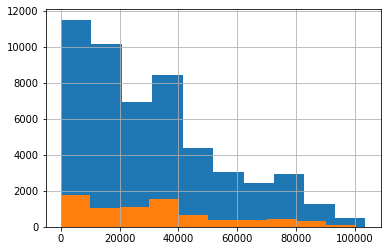

In [118]:
train.groupby(by='fr_yn').sft_emrgnc_bll_dstnc.hist()

## 자동 심장 충격기와의 최소 거리

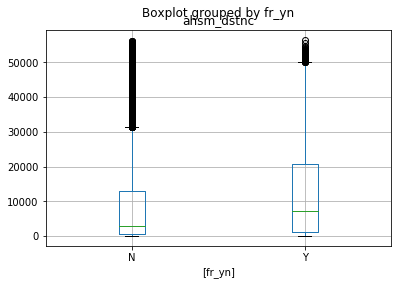

In [119]:
pd.DataFrame(train[['ahsm_dstnc','fr_yn']]).boxplot(by='fr_yn')

In [121]:
print(min(train.ahsm_dstnc))
print(max(train.ahsm_dstnc))
bins_temrtr = [0, 5000, 10000, 15000,20000,25000,30000,35000,40000,45000,50000,57000]
train['ahsm_dstnc_bins'] = pd.cut(train['ahsm_dstnc'], bins_temrtr)
train['ahsm_dstnc_bins']

0
56485


0        (10000, 15000]
1             (0, 5000]
2        (10000, 15000]
3             (0, 5000]
4        (10000, 15000]
              ...      
59194     (5000, 10000]
59195         (0, 5000]
59196         (0, 5000]
59197         (0, 5000]
59198    (10000, 15000]
Name: ahsm_dstnc_bins, Length: 59199, dtype: category
Categories (11, interval[int64]): [(0, 5000] < (5000, 10000] < (10000, 15000] < (15000, 20000] ... (35000, 40000] < (40000, 45000] < (45000, 50000] < (50000, 57000]]

In [122]:
train.columns.get_loc('ahsm_dstnc_bins')

186

In [123]:
cat_search(train.iloc[:,186],train.iloc[:,1])

,Total,Y,N,weights,Y/Total,N/Total
ahsm_dstnc_bins,,,,,,
"(0.0, 5000.0]",33784,3451,30333,0.571,0.10,0.90
"(5000.0, 10000.0]",6247,748,5499,0.106,0.12,0.88
"(10000.0, 15000.0]",5100,727,4373,0.086,0.14,0.86
"(15000.0, 20000.0]",3915,675,3240,0.066,0.17,0.83
"(20000.0, 25000.0]",3986,798,3188,0.067,0.20,0.80
"(25000.0, 30000.0]",2068,352,1716,0.035,0.17,0.83
"(30000.0, 35000.0]",1187,202,985,0.020,0.17,0.83
"(35000.0, 40000.0]",1433,377,1056,0.024,0.26,0.74
"(40000.0, 45000.0]",568,90,478,0.010,0.16,0.84


fr_yn
N    AxesSubplot(0.125,0.125;0.775x0.755)
Y    AxesSubplot(0.125,0.125;0.775x0.755)
Name: ahsm_dstnc, dtype: object

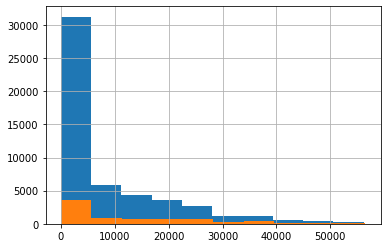

In [124]:
train.groupby(by='fr_yn').ahsm_dstnc.hist()

## 금연구역과의 최소 거리

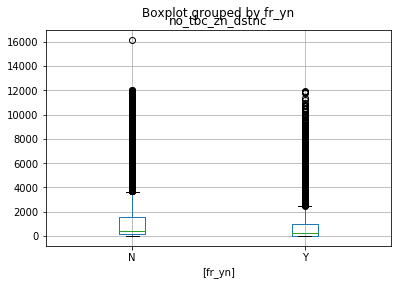

In [125]:
pd.DataFrame(train[['no_tbc_zn_dstnc','fr_yn']]).boxplot(by='fr_yn')

In [127]:
print(min(train.no_tbc_zn_dstnc))
print(max(train.no_tbc_zn_dstnc))
bins_temrtr = [0, 1000, 2000, 3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,17000]
train['no_tbc_zn_dstnc_bins'] = pd.cut(train['no_tbc_zn_dstnc'], bins_temrtr)
train['no_tbc_zn_dstnc_bins']

0
16164


0           (0, 1000]
1        (7000, 8000]
2           (0, 1000]
3           (0, 1000]
4           (0, 1000]
             ...     
59194       (0, 1000]
59195       (0, 1000]
59196       (0, 1000]
59197       (0, 1000]
59198       (0, 1000]
Name: no_tbc_zn_dstnc_bins, Length: 59199, dtype: category
Categories (16, interval[int64]): [(0, 1000] < (1000, 2000] < (2000, 3000] < (3000, 4000] ... (12000, 13000] < (13000, 14000] < (14000, 15000] < (15000, 17000]]

In [128]:
train.columns.get_loc('no_tbc_zn_dstnc_bins')

187

In [131]:
cat_search(train.iloc[:,187],train.iloc[:,1])

,Total,Y,N,weights,Y/Total,N/Total
no_tbc_zn_dstnc_bins,,,,,,
"(0.0, 1000.0]",39399,5676.0,33723,0.666,0.14,0.86
"(1000.0, 2000.0]",8526,821.0,7705,0.144,0.10,0.90
"(2000.0, 3000.0]",4464,390.0,4074,0.075,0.09,0.91
"(3000.0, 4000.0]",2505,253.0,2252,0.042,0.10,0.90
"(4000.0, 5000.0]",1724,203.0,1521,0.029,0.12,0.88
"(5000.0, 6000.0]",1102,103.0,999,0.019,0.09,0.91
"(6000.0, 7000.0]",428,54.0,374,0.007,0.13,0.87
"(7000.0, 8000.0]",431,52.0,379,0.007,0.12,0.88
"(8000.0, 9000.0]",233,31.0,202,0.004,0.13,0.87


fr_yn
N    AxesSubplot(0.125,0.125;0.775x0.755)
Y    AxesSubplot(0.125,0.125;0.775x0.755)
Name: no_tbc_zn_dstnc, dtype: object

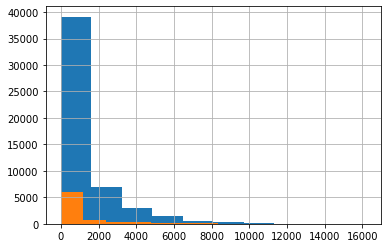

In [132]:
train.groupby(by='fr_yn').no_tbc_zn_dstnc.hist()

## 반경 50M 이내의 건물 수

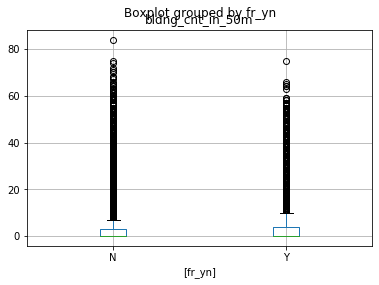

In [133]:
pd.DataFrame(train[['bldng_cnt_in_50m','fr_yn']]).boxplot(by='fr_yn')

In [135]:
print(min(train.bldng_cnt_in_50m))
print(max(train.bldng_cnt_in_50m))
bins_temrtr = [0,10,20,30,40,50,60,70,90]
train['bldng_cnt_in_50m_bins'] = pd.cut(train['bldng_cnt_in_50m'], bins_temrtr)
train['bldng_cnt_in_50m_bins']

0
84


0                 NaN
1                 NaN
2        (10.0, 20.0]
3        (10.0, 20.0]
4                 NaN
             ...     
59194             NaN
59195             NaN
59196             NaN
59197             NaN
59198             NaN
Name: bldng_cnt_in_50m_bins, Length: 59199, dtype: category
Categories (8, interval[int64]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70] < (70, 90]]

In [136]:
train.columns.get_loc('bldng_cnt_in_50m_bins')

188

In [137]:
cat_search(train.iloc[:,188],train.iloc[:,1])

,Total,Y,N,weights,Y/Total,N/Total
bldng_cnt_in_50m_bins,,,,,,
"(0.0, 10.0]",14059,2001,12058,0.237,0.14,0.86
"(10.0, 20.0]",4010,545,3465,0.068,0.14,0.86
"(20.0, 30.0]",2172,321,1851,0.037,0.15,0.85
"(30.0, 40.0]",930,137,793,0.016,0.15,0.85
"(40.0, 50.0]",404,65,339,0.007,0.16,0.84
"(50.0, 60.0]",129,29,100,0.002,0.22,0.78
"(60.0, 70.0]",25,5,20,0.000,0.20,0.80
"(70.0, 90.0]",6,1,5,0.000,0.17,0.83


fr_yn
N    AxesSubplot(0.125,0.125;0.775x0.755)
Y    AxesSubplot(0.125,0.125;0.775x0.755)
Name: bldng_cnt_in_50m, dtype: object

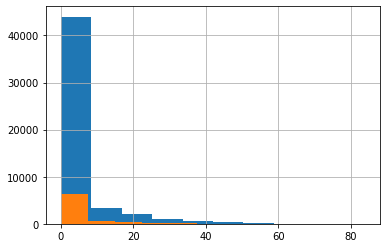

In [138]:
train.groupby(by='fr_yn').bldng_cnt_in_50m.hist()

## 관할 소방서 인원

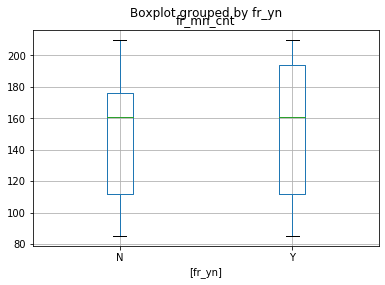

In [139]:
pd.DataFrame(train[['fr_mn_cnt','fr_yn']]).boxplot(by='fr_yn')

In [141]:
print(min(train.fr_mn_cnt))
print(max(train.fr_mn_cnt))
bins_temrtr = [80, 90, 100, 110,120,130,140,150,160,170,180,190,200,210]
train['fr_mn_cnt_bins'] = pd.cut(train['fr_mn_cnt'], bins_temrtr)
train['fr_mn_cnt_bins']


85.0
210.0


0        (130, 140]
1          (80, 90]
2        (130, 140]
3        (170, 180]
4        (130, 140]
            ...    
59194    (130, 140]
59195    (130, 140]
59196    (130, 140]
59197    (130, 140]
59198    (130, 140]
Name: fr_mn_cnt_bins, Length: 59199, dtype: category
Categories (13, interval[int64]): [(80, 90] < (90, 100] < (100, 110] < (110, 120] ... (170, 180] < (180, 190] < (190, 200] < (200, 210]]

In [142]:
train.columns.get_loc('fr_mn_cnt_bins')

189

In [143]:
cat_search(train.iloc[:,189],train.iloc[:,1])

,Total,Y,N,weights,Y/Total,N/Total
fr_mn_cnt_bins,,,,,,
"(80.0, 90.0]",1773,228,1545,0.030,0.13,0.87
"(100.0, 110.0]",8492,1103,7389,0.143,0.13,0.87
"(110.0, 120.0]",8709,1139,7570,0.147,0.13,0.87
"(120.0, 130.0]",3270,404,2866,0.055,0.12,0.88
"(130.0, 140.0]",5895,848,5047,0.100,0.14,0.86
"(160.0, 170.0]",5893,983,4910,0.100,0.17,0.83
"(170.0, 180.0]",12748,485,12263,0.215,0.04,0.96
"(190.0, 200.0]",6007,886,5121,0.101,0.15,0.85
"(200.0, 210.0]",6371,1567,4804,0.108,0.25,0.75


fr_yn
N    AxesSubplot(0.125,0.125;0.775x0.755)
Y    AxesSubplot(0.125,0.125;0.775x0.755)
Name: fr_mn_cnt, dtype: object

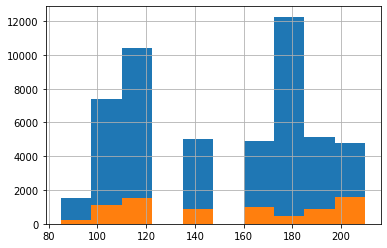

In [144]:
train.groupby(by='fr_yn').fr_mn_cnt.hist()

## 소방점검대상물기준

In [38]:
train['trgt_crtr'].unique()

array([nan, '일반대상물', '민박7실이하', '옥내소화전설치대상', '민박7실이상', '자동화재탐지설치대상',
       '11층이상', '연면적 15,000 이상', '기타(가설건축물분류)', '펜션7실이하',
       '스프링클러,물분무등설치대상', '콘테이너하우스', '주거용비닐하우스',
       '공동주택(주택법시행령제63조제1항각호1에해당)', '견본주택(모델하우스)', '임시사무실,창고,숙소', '기타',
       '펜션7실이상'], dtype=object)

In [39]:
pd.crosstab(train['trgt_crtr'], train['fr_yn'], margins=True)

fr_yn,N,Y,All
trgt_crtr,,,
11층이상,1,1,2
견본주택(모델하우스),1,0,1
공동주택(주택법시행령제63조제1항각호1에해당),1,5,6
기타,0,1,1
기타(가설건축물분류),2,0,2
민박7실이상,15,1,16
민박7실이하,239,55,294
"스프링클러,물분무등설치대상",14,14,28
"연면적 15,000 이상",4,2,6


Text(0.5, 1.0, '건물용도 분류명')

C:\Users\Caleb\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Caleb\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47932 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Caleb\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Caleb\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Caleb\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Caleb\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47448 missing from c

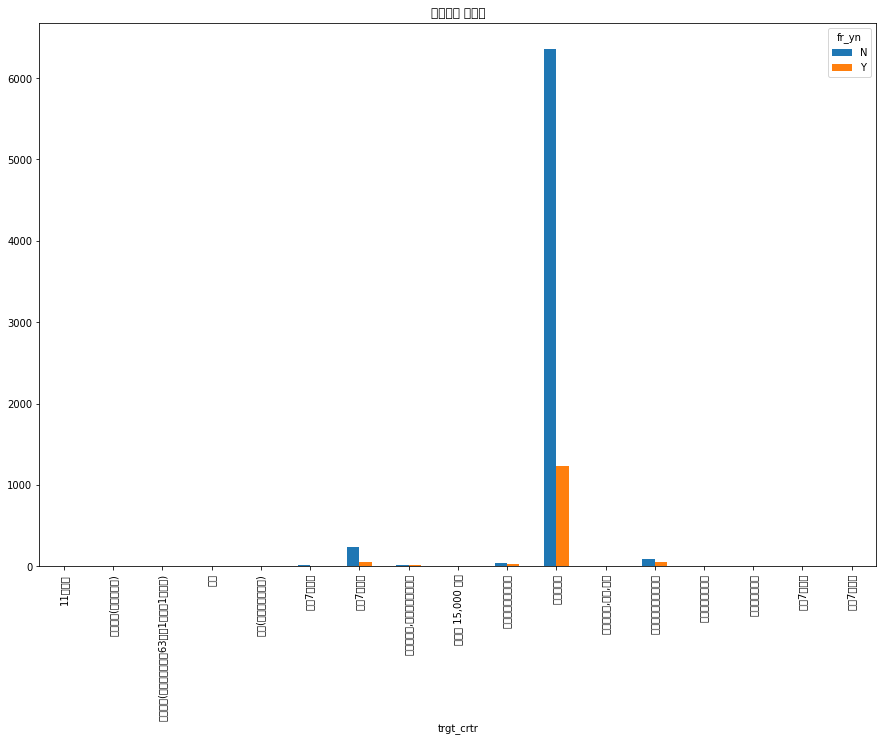

In [41]:
df = train.groupby(['trgt_crtr','fr_yn'])['fr_yn'].count().unstack('fr_yn')
df.plot(kind='bar', figsize=(15,10))
plt.title('건물용도 분류명')

## 소방시설특례5호여부

In [42]:
train['fr_fghtng_fclt_spcl_css_5_yn'].unique()

array([nan, 'N'], dtype=object)

In [43]:
pd.crosstab(train['fr_fghtng_fclt_spcl_css_5_yn'], train['fr_yn'], margins=True)

fr_yn,N,Y,All
fr_fghtng_fclt_spcl_css_5_yn,,,
N,6830,1607,8437
All,6830,1607,8437


## 소방시설특례6호여부

In [44]:
train['fr_fghtng_fclt_spcl_css_6_yn'].unique()

array([nan, 'N'], dtype=object)

In [45]:
pd.crosstab(train['fr_fghtng_fclt_spcl_css_6_yn'], train['fr_yn'], margins=True)

fr_yn,N,Y,All
fr_fghtng_fclt_spcl_css_6_yn,,,
N,6830,1607,8437
All,6830,1607,8437


## 사용여부

In [46]:
train['us_yn'].unique()

array([nan, 'Y', 'N', 'T'], dtype=object)

In [47]:
pd.crosstab(train['us_yn'], train['fr_yn'], margins=True)

fr_yn,N,Y,All
us_yn,,,
N,1021,298,1319
T,280,251,531
Y,6582,1320,7902
All,7883,1869,9752


In [48]:
us_yn_number = train['us_yn'].value_counts()
print("최고", np.max(us_yn_number))
print("최하", np.min(us_yn_number))
print("평균", np.mean(us_yn_number))
print("중위", np.median(us_yn_number))

최고 7902
최하 531
평균 3250.6666666666665
중위 1319.0


## 위험물대상여부

In [49]:
train['dngrs_thng_yn'].unique()

array([nan, 'N', 'Y'], dtype=object)

In [50]:
pd.crosstab(train['dngrs_thng_yn'], train['fr_yn'], margins=True)

fr_yn,N,Y,All
dngrs_thng_yn,,,
N,7878,1868,9746
Y,5,1,6
All,7883,1869,9752


In [51]:
dngrs_thng_yn_number = train['dngrs_thng_yn'].value_counts()
print("최고", np.max(dngrs_thng_yn_number))
print("최하", np.min(dngrs_thng_yn_number))
print("평균", np.mean(dngrs_thng_yn_number))
print("중위", np.median(dngrs_thng_yn_number))

최고 9746
최하 6
평균 4876.0
중위 4876.0


## 자체소방대여부

In [52]:
train['slf_fr_brgd_yn'].unique()

array([nan, 'N'], dtype=object)

In [53]:
pd.crosstab(train['slf_fr_brgd_yn'], train['fr_yn'], margins=True)

fr_yn,N,Y,All
slf_fr_brgd_yn,,,
N,7883,1869,9752
All,7883,1869,9752


## 대량위험물제조소등여부

In [54]:
train['blk_dngrs_thng_mnfctr_yn'].unique()

array([nan, 'N', 'Y'], dtype=object)

In [55]:
pd.crosstab(train['blk_dngrs_thng_mnfctr_yn'], train['fr_yn'], margins=True)

fr_yn,N,Y,All
blk_dngrs_thng_mnfctr_yn,,,
N,7882,1869,9751
Y,1,0,1
All,7883,1869,9752


In [56]:
blk_dngrs_thng_mnfctr_yn_number = train['blk_dngrs_thng_mnfctr_yn'].value_counts()
print("최고", np.max(blk_dngrs_thng_mnfctr_yn_number))
print("최하", np.min(blk_dngrs_thng_mnfctr_yn_number))
print("평균", np.mean(blk_dngrs_thng_mnfctr_yn_number))
print("중위", np.median(blk_dngrs_thng_mnfctr_yn_number))

최고 9751
최하 1
평균 4876.0
중위 4876.0


## 문화재여부

In [57]:
train['cltrl_hrtg_yn'].unique()

array([nan, 'N', 'Y'], dtype=object)

In [58]:
pd.crosstab(train['cltrl_hrtg_yn'], train['fr_yn'], margins=True)

fr_yn,N,Y,All
cltrl_hrtg_yn,,,
N,7882,1869,9751
Y,1,0,1
All,7883,1869,9752


In [59]:
cltrl_hrtg_yn_number = train['cltrl_hrtg_yn'].value_counts()
print("최고", np.max(cltrl_hrtg_yn_number))
print("최하", np.min(cltrl_hrtg_yn_number))
print("평균", np.mean(cltrl_hrtg_yn_number))
print("중위", np.median(cltrl_hrtg_yn_number))

최고 9751
최하 1
평균 4876.0
중위 4876.0
